# Exploratory Data Analysis

### Import Cleaned Data from Data Wrangling Section

Import Libraries

In [1]:
import pandas as pd
import numpy as np

! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('clean.csv')
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,9.0,111.0,5000.0,21,27,13495.0,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,9.0,111.0,5000.0,21,27,16500.0,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,9.0,154.0,5000.0,19,26,16500.0,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,10.0,102.0,5500.0,24,30,13950.0,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,8.0,115.0,5500.0,18,22,17450.0,0,1,1,0


## Data Description

### let's start by describing our data, it will come in handy during analysis

In [3]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


### Let's also include our categorical variables skipped by the step above

In [4]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205
unique,22,2,5,3,2,7,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,116,96,120,202,148,159,94


## Business Case 1

#### What proportion (in %) of the total is each car make 

In [5]:
trans = df['make'].value_counts()
pct = (trans / trans.sum()) * 100
pct.astype(int)

toyota           15
nissan            8
mazda             8
mitsubishi        6
honda             6
volkswagen        5
subaru            5
peugot            5
volvo             5
dodge             4
bmw               3
mercedes-benz     3
plymouth          3
audi              3
saab              2
porsche           2
isuzu             1
chevrolet         1
alfa-romero       1
jaguar            1
renault           0
mercury           0
Name: make, dtype: int32

### Question 1

Find a variable which has a strongest relationship with price, such that a change in it's value will have the sudden significant impact on the price

##### let's find out the relationships between all variables (columns)

In [6]:
relationship = df.corr()
relationship

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095,0.241820,-0.241820,-0.222970,0.222970


### Let's visualize this in form of a heatmap

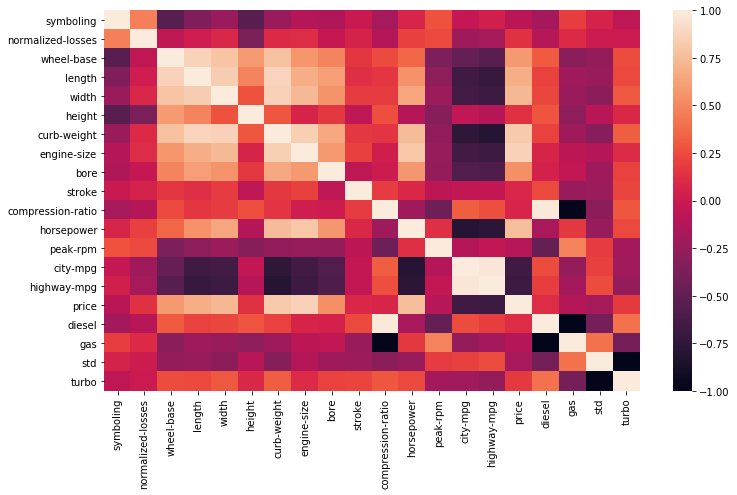

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr())

#### Let's select the variable with the maximum influence on price

Since price to price relationship is the maximum in the dataframe, let's drop that row and take the maximum of the remaining variables

In [8]:
sort_by_price = relationship.sort_values('price',ascending=False)
sort_by_price

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
price,-0.082201,0.133999,0.583168,0.682986,0.728699,0.134388,0.820825,0.861752,0.532300,0.082095,0.070990,0.757917,-0.100854,-0.667449,-0.690526,1.000000,0.110207,-0.110207,-0.177285,0.177285
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752,0.069594,-0.069594,-0.108217,0.108217
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825,0.217275,-0.217275,-0.324902,0.324902
horsepower,0.071389,0.203434,0.351957,0.554434,0.642195,-0.110137,0.750968,0.810713,0.575737,0.088264,-0.205740,1.000000,0.130971,-0.803162,-0.770903,0.757917,-0.165190,0.165190,-0.240182,0.240182
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699,0.233880,-0.233880,-0.300567,0.300567
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986,0.212679,-0.212679,-0.234539,0.234539
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168,0.308346,-0.308346,-0.257611,0.257611
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300,0.054457,-0.054457,-0.212623,0.212623
turbo,-0.059866,-0.006823,0.257611,0.234539,0.300567,0.087311,0.324902,0.108217,0.212623,0.222970,0.295541,0.240182,-0.183629,-0.202362,-0.254416,0.177285,0.401397,-0.401397,-1.000000,1.000000
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388,0.284631,-0.284631,-0.087311,0.087311


In [9]:
# price row won't give us the information we need, so let's drop it
sort_by_price.drop('price', axis=0, inplace=True) 

In [10]:
sort_by_price.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752,0.069594,-0.069594,-0.108217,0.108217
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825,0.217275,-0.217275,-0.324902,0.324902
horsepower,0.071389,0.203434,0.351957,0.554434,0.642195,-0.110137,0.750968,0.810713,0.575737,0.088264,-0.205740,1.000000,0.130971,-0.803162,-0.770903,0.757917,-0.165190,0.165190,-0.240182,0.240182
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699,0.233880,-0.233880,-0.300567,0.300567
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986,0.212679,-0.212679,-0.234539,0.234539


In [11]:
max_price_corr = sort_by_price['price'].max() #find the maximum correlation 
max_price_corr

0.861752243685972

From the sorted correlation matrix above, we see that the maximum after dropping price row is 'engine-size'

In [12]:
print('Engine size has the strongest relationship with price, at a correlation of ' + str(max_price_corr))

Engine size has the strongest relationship with price, at a correlation of 0.861752243685972


##### let's visualize how engine size can be a potential predictor of price

(0, 52371.40676382155)

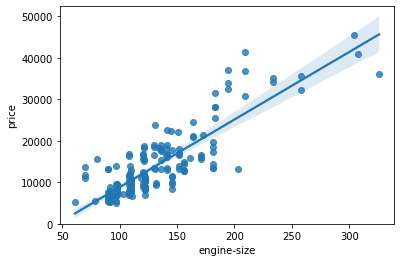

In [13]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

### Question 2

#### What is the relationship between 5 variables with the most impact on car price?

In [14]:
df[['engine-size', 'curb-weight', 'width', 'length']].corr()

,engine-size,curb-weight,width,length
engine-size,1.000000,0.850594,0.735433,0.683360
curb-weight,0.850594,1.000000,0.867032,0.877728
width,0.735433,0.867032,1.000000,0.841118
length,0.683360,0.877728,0.841118,1.000000


### Business case 3

How can we tell which car category mostly define the car price?

let's first see the correlation, then visualize

##### Body Style

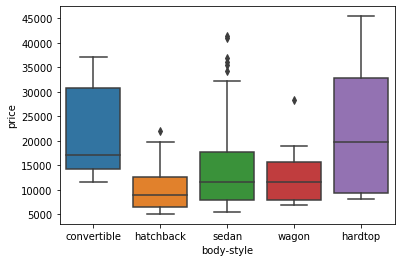

In [15]:
#let's use body type to answer this question
sns.boxplot(x="body-style", y="price", data=df)

##### Engine Location

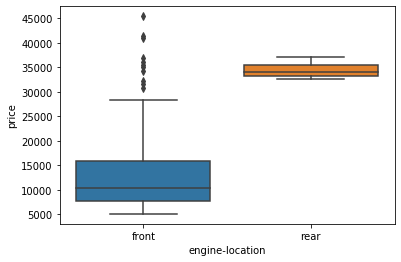

In [16]:
sns.boxplot(x="engine-location", y="price", data=df)

##### Drive Wheels

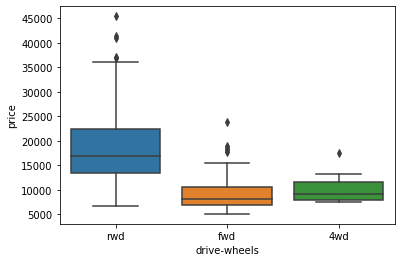

In [17]:
sns.boxplot(x="drive-wheels", y="price", data=df)

##### Number of doors

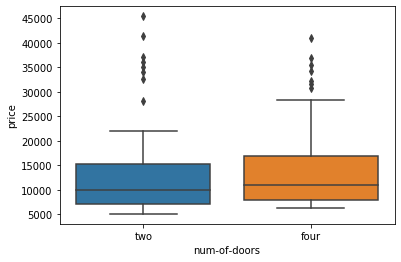

In [18]:
sns.boxplot(x="num-of-doors", y="price", data=df)

##### Make

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

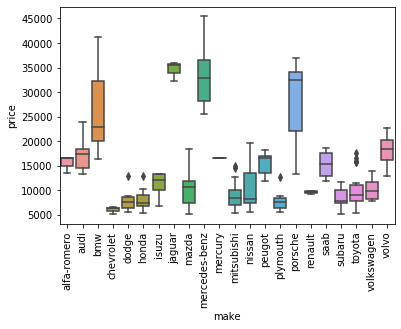

In [19]:
sns.boxplot(x="make", y="price", data=df)
plt.xticks(rotation=90)

### Descriptive statistical analysis

### Business Case 6

#### Which category combination is the most expensive

In [20]:
df_group_zero = df[['make', 'num-of-doors', 'body-style', 'drive-wheels', 'price']]
df_group_zero

,make,num-of-doors,body-style,drive-wheels,price
0,alfa-romero,two,convertible,rwd,13495.0
1,alfa-romero,two,convertible,rwd,16500.0
2,alfa-romero,two,hatchback,rwd,16500.0
3,audi,four,sedan,fwd,13950.0
4,audi,four,sedan,4wd,17450.0
...,...,...,...,...,...
200,volvo,four,sedan,rwd,16845.0
201,volvo,four,sedan,rwd,19045.0
202,volvo,four,sedan,rwd,21485.0
203,volvo,four,sedan,rwd,22470.0


In [21]:
df_group_zero.sort_values('price',ascending=False)

,make,num-of-doors,body-style,drive-wheels,price
74,mercedes-benz,two,hardtop,rwd,45400.0
16,bmw,two,sedan,rwd,41315.0
73,mercedes-benz,four,sedan,rwd,40960.0
128,porsche,two,convertible,rwd,37028.0
17,bmw,four,sedan,rwd,36880.0
...,...,...,...,...,...
76,mitsubishi,two,hatchback,fwd,5389.0
150,toyota,two,hatchback,fwd,5348.0
50,mazda,two,hatchback,fwd,5195.0
18,chevrolet,two,hatchback,fwd,5151.0


In [22]:
df_group_zero.to_excel(r'C:\Users\lawt9\Desktop\Dataset\Wrangled\grouped.xlsx', index=False)

## Business case 7

#### What is the average price of each body style

In [23]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.289410
3,sedan,14433.658945
4,wagon,12371.960000


### Correlation and Causation

In [26]:
from scipy import stats

#### wheel base vs price

In [27]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5831681499789547  with a P-value of P = 4.527625545686765e-20


##### conclusion

Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

#### Length vs Price

In [28]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6829862954386215  with a P-value of P =  1.649887329121971e-29


##### Conclusion

Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

#### Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

#### Categorical variables:

Drive-wheels